Execute the following cell to render the README.md inside the notebook:

In [1]:
from IPython.display import display, Markdown
with open('README.md', 'r') as fh:
    content = fh.read()
display(Markdown(content))

# Hands-on binfit tutorial notebook

Tutorial for the [binfit](https://stash.desy.de/users/sutclw/repos/binfit)
package developed for template fits in Belle II analyses.

## Background information on `binfit` and relation to `TemplateFitter`

`binfit` is a python package for performing template fits in pure python
developed and maintained by [William
Sutcliffe](mailto:william.sutcliffe08@gmail.com).

Its code is based in large parts on [Maximillian
Welsch](mailto:mwelsch@uni-bonn.de)'s `TemplateFitter` package, which is also
openly [available on github](https://github.com/welschma/TemplateFitter).

Another fork of the `TemplateFitter` package is being actively developed by
[Felix Metzner](mailto:felix.metzner@kit.edu), also [on
github](https://github.com/FelixMetzner/TemplateFitter). As far as I understand
he extends it generalizes the template fitter, e.g. with support for arbitrary
dimensions, adaptive binning.

## Features

The distinguishing feature of `binfit` from the other `TemplateFitter` packages,
is that it gets rid of for-loops over the decay-channels in the fit by
using matrix multiplications for all operations.


## Other references / tutorials

An already existing example notebook can be found in the
[binfit/examples/](https://stash.desy.de/users/sutclw/repos/binfit/browse/binfit/examples)
directory of the packages. It requires you to clone binfit (see *Installation*
section below). I will take inspiration from that.

There is a `docs/` directory which is meant to contain sphinx package
documentation (what basf2 uses) in RestructuredText (rst format), but the
installation instructions there are outdated. Maybe that will change. Feel free
to contribute if you want.

Max had already given a nice tutorial for his package at the October 2019 B2GM.
In his talk he gave a very nice overview on the theory of template fitting, so I
recommend you to look at his
[slides](https://indico.belle2.org/event/1158/contributions/4726/attachments/2809/4241/b2gm_templatefitter.pdf).
If you want to try out Max' `TemplateFitter`, e.g. to compare it to `binfit`,
there's already good
[tutorials](https://github.com/welschma/TemplateFitter/blob/master/examples/basic_example.ipynb)
in his packages `examples` folder. Also, his package has a nice sphinx
[online-documentation on
readthedocs](https://templatefitter.readthedocs.io/en/latest/index.html).

## Tutorial author

[Michael Eliachevitch](mailto:meliache@uni-bonn.de "email")


## Installation

### Variant 1: pip install via single command
The fastest is to just install it via `pip` with a single command (if you haven't installed it yet, you can just execute the notebook cell below):

In [27]:
!python3 -m pip install --user --upgrade "git+ssh://git@stash.desy.de:7999/~sutclw/binfit.git"

### Variant 2: Clone the repository (recommended)

I would recommend thi options, because that makes it actually easier to navigate the source code locally.
Also, you will be able to browse the documentation and examples which come with the package.

```bash
git clone ssh://git@stash.desy.de:7999/~sutclw/binfit.git
cd binfit
python3 -m pip3 install --user --editable --upgrade . 
```

The last install command will install the package and its requirements. The `--editable` changes the installation so that it is performed by symlinking the package files instead of copying them. As a result, if you change something in the source code, the changes will immediately effect the installed version.

## Usage
As soon as the package is installed, you should be able to successfully import it:

In [21]:
import binfit
from binfit.parameters.parametershandler import ParameterHandler
import binfit.fitting
import pandas as pd
import numpy as np
import scipy.optimize

### Load dataframes

In [3]:
df_umatch = pd.read_pickle('data/ulnu.pickle')
df_D = pd.read_pickle('data/D.pickle')
df_Dst = pd.read_pickle('data/Dst.pickle')
df_Dstst = pd.read_pickle('data/Dstst.pickle')

df_tot = pd.concat([df_umatch, df_D,df_Dst, df_Dstst])
df_tot.T

,3,4,13,18,33,35,42,81,94,99,...,407937,408075,408741,408830,408899,409074,409201,409242,409271,409299
Dgam_FF_downweight0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Dgam_FF_downweight1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Dgam_FF_downweight2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Dgam_FF_downweight3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Dgam_FF_downweight4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
veto_slowNeuPi_q2,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,...,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000
BDT_prediction,0.861051,0.923874,0.855147,0.895396,0.868223,0.867276,0.881392,0.911360,0.895396,0.869359,...,0.869381,0.893322,0.876564,0.885773,0.860214,0.900854,0.880726,0.877784,0.869857,0.869244
final_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pp,0.374950,0.878394,0.530645,0.511303,0.887353,0.642553,0.674591,0.534917,0.390654,0.443020,...,1.507919,0.944721,0.686002,2.069228,1.670192,1.212945,1.006661,1.130347,1.545020,1.919404


Inspect the dataframes

In [4]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35916 entries, 3 to 409299
Columns: 557 entries, Dgam_FF_downweight0 to FinalWeight
dtypes: float32(195), float64(325), int32(33), int64(1), uint32(3)
memory usage: 122.5 MB


In [5]:
df_tot.describe().T

,count,mean,std,min,25%,50%,75%,max
Dgam_FF_downweight0,10322.0,478.578506,2132.512677,6.162058e-01,1.000000,1.000000,1.000000,10000.000000
Dgam_FF_downweight1,10322.0,478.574170,2132.513648,6.845127e-01,1.000000,1.000000,1.000000,10000.000000
Dgam_FF_downweight2,10322.0,478.576607,2132.513102,6.170432e-01,1.000000,1.000000,1.000000,10000.000000
Dgam_FF_downweight3,10322.0,478.582045,2132.511884,6.759266e-01,1.000000,1.000000,1.000000,10000.000000
Dgam_FF_downweight4,10322.0,478.577504,2132.512901,6.884878e-01,1.000000,1.000000,1.000000,10000.000000
...,...,...,...,...,...,...,...,...
veto_slowNeuPi_q2,35916.0,-28.350130,430.470734,-5.000000e+01,-50.000000,-50.000000,-50.000000,10000.000000
BDT_prediction,35916.0,0.889762,0.023481,8.500130e-01,0.869359,0.888817,0.907894,0.986653
final_weight,11394.0,0.140711,0.039741,0.000000e+00,0.116893,0.170653,0.171431,0.171431
pp,35916.0,0.785941,0.522171,-1.192093e-07,0.394626,0.708361,1.082804,5.128110


### Create histograms

Binfit provided the `Hist1d` and `Hist2d` histogram classes which were first introduced in the `TemplateFitter` (this code was directly copied and unchanged, so you can switch between fitters without worrying about your histogram code).

Lets look at their signature and documentation, as we always do when we use functions/classes which we haven't seen before, to see how to use them. For that we can use a questionmark (see below) or type `Shift+Tab` on a function name. Add a second questionmark (`??`) to also see the source code:

In [6]:
binfit.Hist1d?
# binfit.Hist2d?

Init signature: binfit.Hist1d(bins, range=None, data=None, weights=None)
Docstring:     
A 1 dimensional histogram.
    
File:           ~/.local/lib/python3.6/site-packages/binfit/histograms/hist1d.py
Type:           ABCMeta
Subclasses:     


Create 1D histograms in variable `gx_m` for different components

In [7]:
var = 'gx_m'
var_binning = np.array([0., 1.6, 1.9, 2.3, 2.5, 2.8])
bin_range = (var_binning[0], var_binning[-1])

hsig = binfit.Hist1d(bins=var_binning, range=bin_range, data=df_umatch[var], weights=df_umatch['tot_w_0'])
hD = binfit.Hist1d(bins=var_binning, range=bin_range, data=df_D[var], weights=df_D['tot_w_0'])
hDst = binfit.Hist1d(bins=var_binning, range=bin_range, data=df_Dst[var], weights=df_Dst['tot_w_0'])
hDstst = binfit.Hist1d(bins=var_binning, range=bin_range, data=df_Dstst[var], weights=df_Dstst['tot_w_0'])
htot = binfit.Hist1d(bins=var_binning, range=bin_range, data=df_tot[var], weights=df_tot['tot_w_0'])

To view the histogram contents, we can just look at its dictionary representation:

In [8]:
htot.__dict__

{'_bin_counts': array([1348.85395079,  899.23408569, 1721.96584189,  513.2115362 ,
         400.24599317]),
 '_bin_errors_sq': array([322.49223686, 325.39504215, 681.73434804, 211.19044184,
        162.38729156]),
 '_bin_edges': array([0. , 1.6, 1.9, 2.3, 2.5, 2.8]),
 '_num_bins': 5,
 '_shape': (5,),
 '_range': (0.0, 2.8),
 '_is_empty': False}

### Create templates from our histograms

Again, first look at the signature of the functions that we will use

In [9]:
binfit.Template1d?

Init signature:
binfit.Template1d(
    name,
    variable,
    hist1d,
    params,
    color=None,
    pretty_variable=None,
    pretty_label=None,
)
Docstring:     
A 1d template class.
    
Init docstring:
Constructor 
Parameters 
----------
name : str
 template name
param : ParameterHandler
 parameter handler
File:           ~/.local/lib/python3.6/site-packages/binfit/templates/template1d.py
Type:           ABCMeta
Subclasses:     


In [10]:
binfit.MultiNormTemplate?

Init signature:
binfit.MultiNormTemplate(
    name,
    templates,
    params,
    initialpars,
    color=None,
    pretty_variable=None,
    pretty_label=None,
)
Docstring:     
combines several templates according to fractions.
This produces a new pdf.
Init docstring:
Constructor 
Parameters 
----------
name : str
 template name
param : ParameterHandler
 parameter handler
File:           ~/.local/lib/python3.6/site-packages/binfit/templates/multitemplate.py
Type:           ABCMeta
Subclasses:     


In [11]:
params = ParameterHandler()

# signal template
tsig = binfit.Template1d('ulnu', var, hsig, params, color='indianred')

# continuum templates
tD = binfit.Template1d('D',var, hD, params, color='navy')
tDst = binfit.Template1d('Dst', var, hDst, params, color='orange')
tDstst = binfit.Template1d('Dstst', var, hDstst,params, color='olivedrab')

# combine continuum templates
ctemps = {'D':tD,'Dst':tDst,'Dstst':tDstst}
pars = {'D':0.3,'Dst':0.5}
tbkg = binfit.MultiNormTemplate('clnu', ctemps,params,pars,color = 'lightskyblue')

### Build a model to fit

This is the most important part in every fit and also where all the magic in the `binfit` package happens

In [12]:
binfit.ModelBuilder?

Init signature: binfit.ModelBuilder(params, data, channels='False')
Docstring:      <no docstring>
File:           ~/.local/lib/python3.6/site-packages/binfit/models/modelbuilder.py
Type:           type
Subclasses:     


In [13]:
model = binfit.ModelBuilder(params, htot)
model.AddTemplate(tsig, 1000.)
model.AddTemplate(tbkg, 4000.)

In [14]:
def post_template_model_initialization(model):
    """Model methods that have to be called after the templates had been added to the model
    
    I don't understand why there isn't a method already that does all that automatically,
    but we can define one ourselves. 
    """
    model._create_block_diag_inv_corr_mat()
    model.TemplateMatrix() # doc: Creates the fixed template stack
    model.RelativeErrorMatrix() # doc: Creates the fixed template stack 
    model.InitialiseBinPars() # doc: Add parameters for the template
    model.FractionConverter() # doc: Determines the matrices required to tranform the subtemplate parameters
    
post_template_model_initialization(model)

### Do the fit (minimize cost function)

In [22]:
fitter = binfit.fitting.BinFitter(model, 'iminuit')
fitter.do_fit?

In [25]:
fit_result = fitter.do_fit()

[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
------------------------------------------------------------------
| FCN = 4.724E-07               |     Ncalls=530 (530 total)     |
| EDM = 4.72E-07 (Goal: 0.0001) |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------

In [26]:
fit_result.succes

True

### Create plots

In [55]:
import matplotlib.pyplot as plt

/home/michael/.local/lib/python3.6/site-packages/binfit/parameters/parametershandler.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return(self._npars[indices])


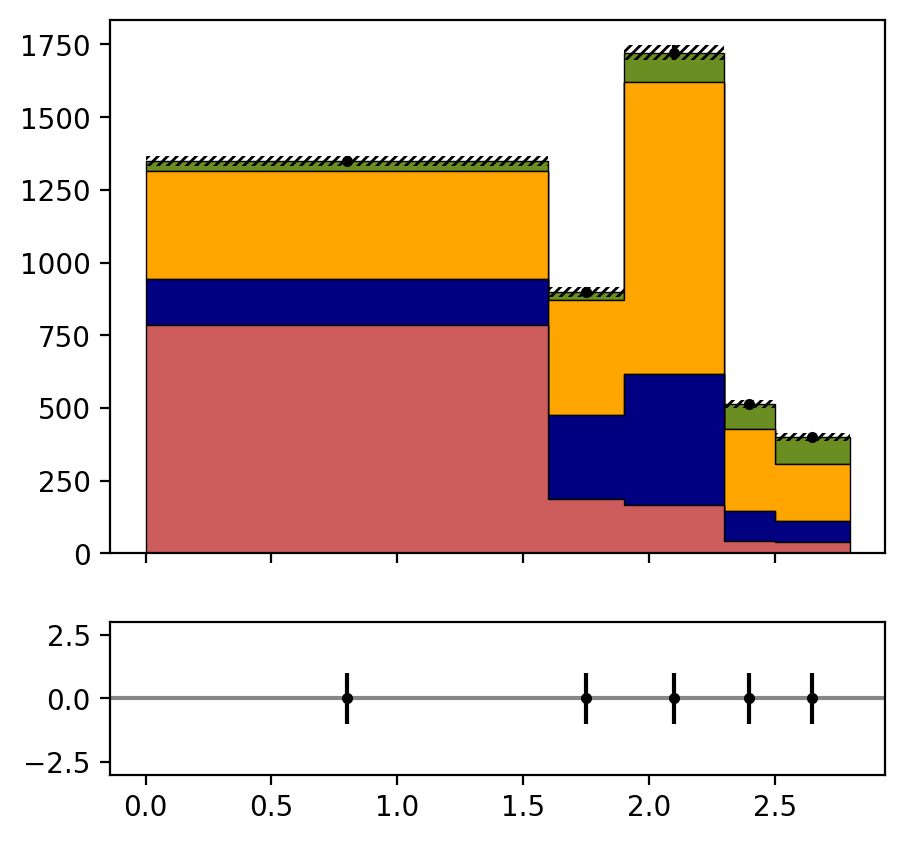

In [74]:
fig, axis_array = plt.subplots(2, 1, figsize=(5, 5), dpi=200, sharex=True, gridspec_kw={"height_ratios": [3.5, 1]})
model.plot_stacked_on(axis_array, All=True)